<a href="https://colab.research.google.com/github/nikitius20/ML_test/blob/main/Denoising_image_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [481]:
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

from sklearn.model_selection import train_test_split


import pandas as pd


In [482]:
url="/content/drive/MyDrive/data/"

noise_free_list = []
noise_list = []
first_index = 10;
second_index = 1;
for i in range(40):
  one_curve_list = [];
  for j in range(10):

    df = pd.read_csv(f"{url}cor_{first_index}_{second_index}_{j}.csv", header=None)

    #creating an array of values, from array of arrays
    flat_list = []
    for xs in df.values.tolist():
      for x in xs:
        flat_list.append(x)

    print(f"downloading cor_{first_index}_{second_index}_{j}.csv")
    if(j==0):
      noise_free_list.append(flat_list)
    else:
      one_curve_list.append(flat_list)

  noise_list.append(one_curve_list)

  if(second_index==5):
    second_index = 1;
    first_index += 1;
  else:
    second_index+=1;

downloading cor_10_1_0.csv
downloading cor_10_1_1.csv
downloading cor_10_1_2.csv
downloading cor_10_1_3.csv
downloading cor_10_1_4.csv
downloading cor_10_1_5.csv
downloading cor_10_1_6.csv
downloading cor_10_1_7.csv
downloading cor_10_1_8.csv
downloading cor_10_1_9.csv
downloading cor_10_2_0.csv
downloading cor_10_2_1.csv
downloading cor_10_2_2.csv
downloading cor_10_2_3.csv
downloading cor_10_2_4.csv
downloading cor_10_2_5.csv
downloading cor_10_2_6.csv
downloading cor_10_2_7.csv
downloading cor_10_2_8.csv
downloading cor_10_2_9.csv
downloading cor_10_3_0.csv
downloading cor_10_3_1.csv
downloading cor_10_3_2.csv
downloading cor_10_3_3.csv
downloading cor_10_3_4.csv
downloading cor_10_3_5.csv
downloading cor_10_3_6.csv
downloading cor_10_3_7.csv
downloading cor_10_3_8.csv
downloading cor_10_3_9.csv
downloading cor_10_4_0.csv
downloading cor_10_4_1.csv
downloading cor_10_4_2.csv
downloading cor_10_4_3.csv
downloading cor_10_4_4.csv
downloading cor_10_4_5.csv
downloading cor_10_4_6.csv
d

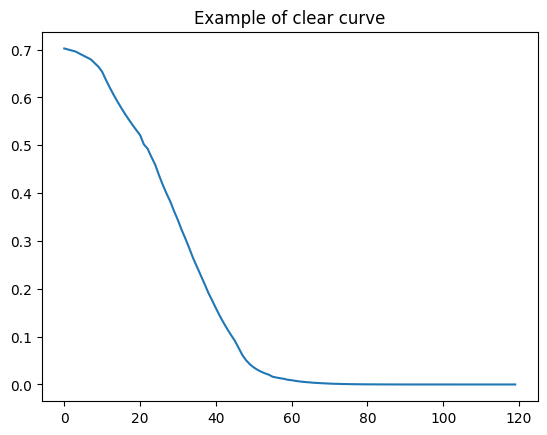

In [483]:
plt.plot(noise_free_list[1])
plt.title("Example of clear curve")
plt.show()

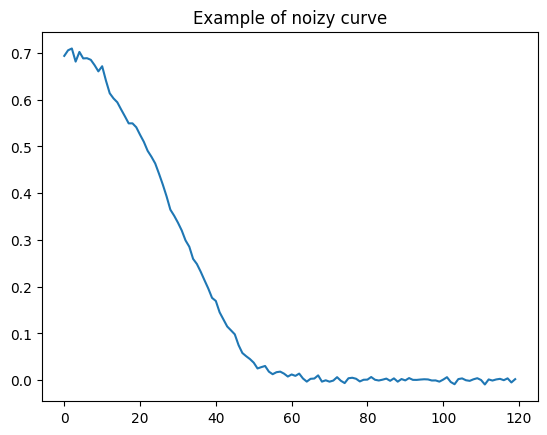

In [484]:
plt.plot(noise_list[1][0])
plt.title("Example of noizy curve")
plt.show()

In [485]:
class Model(nn.Module):

  def __init__(self):
    super().__init__()



    self.encoder = nn.Sequential(
        nn.Conv1d(9, 21, kernel_size=3, padding = 2),
        nn.ReLU(),
        nn.Conv1d(21, 65, kernel_size=3, padding = 2),
        nn.ReLU(),
        nn.Conv1d(65, 1, kernel_size=3, padding = 2)
     )
    self.decoder = nn.Sequential(
        nn.ConvTranspose1d(1, 65, kernel_size=3, padding = 2),
        nn.ReLU(),
        nn.ConvTranspose1d(65, 21, kernel_size=3, padding = 2),
        nn.ReLU(),
        nn.ConvTranspose1d(21, 9, kernel_size=3, padding = 2),
        nn.ReLU(),
        nn.ConvTranspose1d(9, 1, kernel_size=3, padding = 1),
      )
    '''
    self.encoder = nn.Sequential(
        nn.Linear(120, 60),
        nn.ReLU(),
        nn.Linear(60, 30),
        nn.ReLU(),
        nn.Linear(30, 12),
        nn.ReLU(),
        nn.Linear(12, 3),
    )
    self.decoder = nn.Sequential(
        nn.Linear(3, 12),
        nn.ReLU(),
        nn.Linear(12, 30),
        nn.ReLU(),
        nn.Linear(30, 60),
        nn.ReLU(),
        nn.Linear(60, 120),
    )'''

  def forward(self, x):
    encoded = self.encoder(x);
    decoded = self.decoder(encoded);

    return decoded

In [486]:
model = Model()

criterian = nn.MSELoss();

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0000001)

noise_list, noise_list_test, noise_free_list, noise_free_list_test = train_test_split(noise_list, noise_free_list, test_size=0.2)

noise_list = torch.FloatTensor(noise_list);
noise_list_test = torch.FloatTensor(noise_list_test);


noise_free_list = torch.FloatTensor(noise_free_list);
noise_free_list_test = torch.FloatTensor(noise_free_list_test);


'''
noise_list = torch.FloatTensor(noise_list)
print(noise_list.shape)

noise_free_list = torch.FloatTensor(noise_free_list)
print(noise_free_list.shape)

'''


'\nnoise_list = torch.FloatTensor(noise_list)\nprint(noise_list.shape)\n\nnoise_free_list = torch.FloatTensor(noise_free_list)\nprint(noise_free_list.shape)\n\n'

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([120])) that is different to the input size (torch.Size([1, 120])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


curve: 0, and loss: 0.059200868010520935
curve: 1, and loss: 0.05185936391353607
curve: 2, and loss: 0.056566741317510605
curve: 3, and loss: 0.006357633043080568
curve: 4, and loss: 0.0021017545368522406
curve: 5, and loss: 0.00595173891633749
curve: 6, and loss: 0.0007278939592652023
curve: 7, and loss: 0.00011530667688930407
curve: 8, and loss: 0.0007280391873791814
curve: 9, and loss: 0.00573615450412035
curve: 10, and loss: 0.000859299034345895
curve: 11, and loss: 0.006976267788559198
curve: 12, and loss: 0.001932612038217485
curve: 13, and loss: 0.001350429025478661
curve: 14, and loss: 8.008762233657762e-05
curve: 15, and loss: 7.223165448522195e-05
curve: 16, and loss: 0.0002171591331716627
curve: 17, and loss: 0.0003857699048239738
curve: 18, and loss: 0.0003284007834736258
curve: 19, and loss: 0.00011523204739205539
curve: 20, and loss: 0.005455441772937775
curve: 21, and loss: 0.00013663634308613837
curve: 22, and loss: 8.850898302625865e-05
curve: 23, and loss: 9.709806181

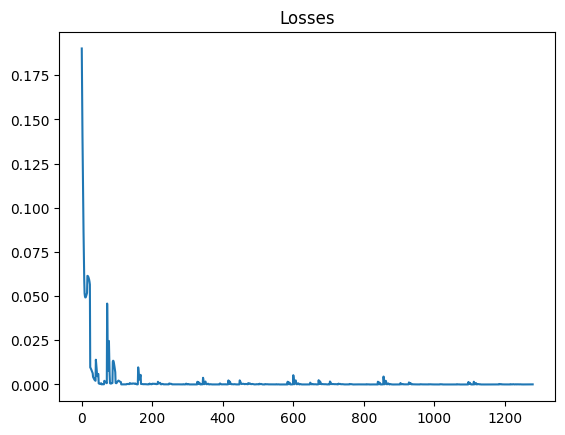

In [487]:
epoch = 5;
losses = []
for e in range(epoch):
  for i in range(len(noise_list)):
    for j in range(8):
      y_pred = model.forward(noise_list[i]);

      loss = criterian(y_pred, noise_free_list[i]);

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      losses.append(loss.detach().numpy())

    print(f'curve: {i}, and loss: {loss}');


plt.title("Losses")
plt.plot(losses)

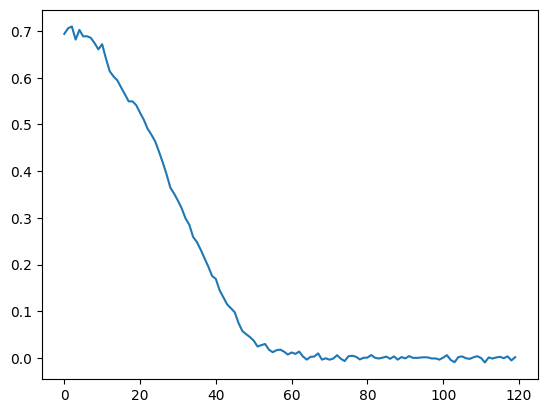

In [488]:
plt.plot(noise_list[2][0].detach().numpy())

(1, 120)
(1, 120)


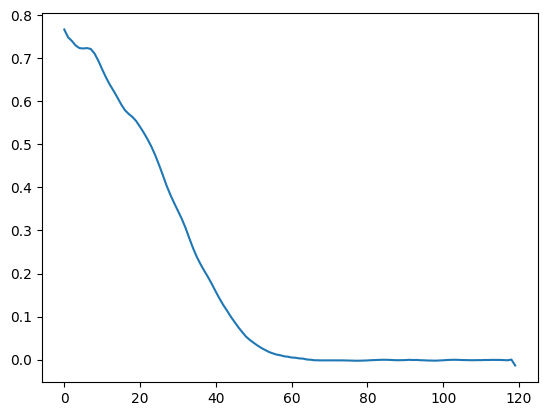

In [498]:
res = model.forward(noise_list[2]).detach().numpy()
print(res.shape)
print(res.shape)
plt.plot(res[0])

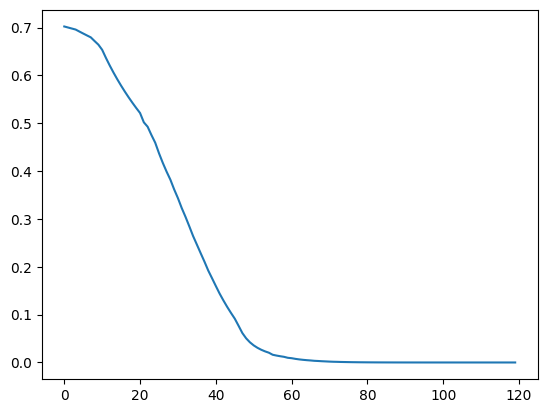

In [491]:
plt.plot(noise_free_list[2].detach().numpy())

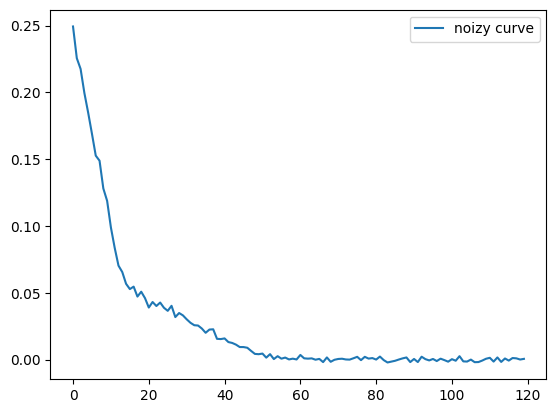

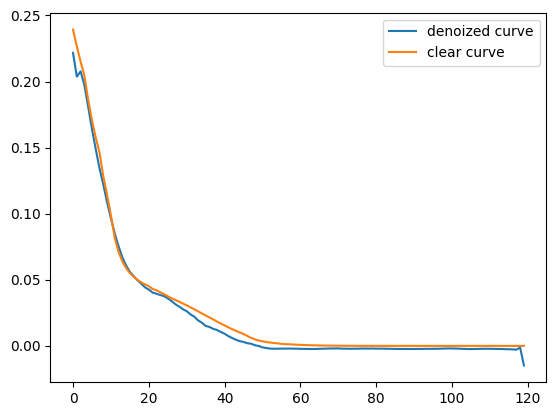

In [507]:
x=10


plt.plot(noise_list[x][0].detach().numpy())

plt.legend({'noizy curve'})
plt.show()

res = model.forward(noise_list[x]).detach().numpy()
plt.plot(res[0], label='denoized curve')

plt.plot(noise_free_list[x].detach().numpy(), label='clear curve')
plt.legend({'denoized curve','clear curve'})
plt.show()

In [501]:
# Evaluation


with torch.no_grad():
  y_eval = model.forward(noise_list_test)[0]
  loss = criterian(y_eval, noise_free_list_test)
  print(f'The loss is {loss}')

The loss is 0.02272157557308674


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([8, 120])) that is different to the input size (torch.Size([1, 120])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [504]:
#save as CSV

for i in range(len(noise_list_test)):
  y_eval = model.forward(noise_list_test)[0].detach().numpy()
  df = pd.DataFrame(y_eval)
  df.to_csv(f"/content/drive/MyDrive/result_csv_data/file№{i}.csv", header=False, index=False)